# TECH CHALLENGE - FASE 2 - Time Series

## Introdução

No contexto do Tech Challenge da Fase 2, foi solicitado o desenvolvimento de uma solução de análise de séries temporais.

Os objetivos principais desta fase são:

1. Demonstrar o fluxo completo do modelo, desde a captura dos dados até a entrega do resultado final, com um storytelling claro e objetivo.
2. Justificar a técnica utilizada para resolver o problema.
3. Alcançar uma acurácia mínima de 70%.

## Dados Utilizados

A base de dados utilizada foi obtida na plataforma Investing, conforme indicado no problema do desafio. Para acessar os dados, foi necessário realizar cadastro na plataforma e selecionar o período desejado no link:
https://br.investing.com/indices/bovespa-historical-data.

O período selecionado foi 01/01/2000 a 17/01/2025, gerando um dataset com as seguintes características:

* Número de registros: 6.195 linhas;
* Número de colunas: 7.

## Descrição das Colunas
1. Data: Data do índice Ibovespa.
2. Último: Valor de fechamento do índice Ibovespa no dia.
3. Abertura: Valor de abertura do índice Ibovespa no dia.
4. Máxima: Valor máximo alcançado pelo índice no dia.
5. Mínima: Valor mínimo alcançado pelo índice no dia.
6. Vol.: Volume movimentado no dia (em valores financeiros).
7. ar%: Variação percentual entre o valor de fechamento do dia anterior e o do dia atual.

## Pré-processamento e Transformações

### 1. Concatenação de Dados:
Devido à limitação na quantidade de dados que podem ser extraídos de uma única vez na plataforma, foi necessário realizar duas extrações separadas. Os dados foram, então, concatenados em um único DataFrame.

### 2. Análise de Qualidade dos Dados:
A verificação inicial foi realizada com o comando df.info(), que indicou que todas as colunas estavam devidamente preenchidas, sem valores nulos ou ausentes.

### 3. Conversão de Índice Temporal:
A coluna Data foi convertida para o tipo datetime e definida como índice do DataFrame, facilitando análises baseadas em séries temporais e operações ao longo da linha temporal.

### 4. Análise de Outliers e Estacionariedade:
Foi feita uma inspeção visual da série temporal para identificar a presença de outliers ou padrões inconsistentes. A análise indicou que:

* Não há outliers evidentes que comprometam a integridade da série.

* A série não é estacionária, o que foi confirmado utilizando o teste de Dickey-Fuller e realizando a observação de tendência ao longo do tempo.

![Grafico Ibovespa](Inserir grafico ibovespa)

## Modelagem

Para o problema, foram testados três modelos de previsão sendo eles o modelo de
1. ARIMA: onde foi realizado a primeira diferença para tornar a linha temporal estacionaria;
2. Regressão Linear;
3. Prophet.

Foram testados esses modelos com o foco de identificar aquele que melhor capturasse a dinâmica da série temporal e atingisse os objetivos do desafio. O modelo que apresentou os melhores resultados foi o Prophet, desenvolvido pela Meta (anteriormente Facebook).

## Métrica de Avaliação

A primeira métrica utilizada para avaliar o desempenho do modelo foi o Erro Médio Absoluto Percentual (MAPE), o MAPE retorna um valor entre 0 e 1, e deve ser multiplicado por 100 para ter o percentualde acordo com a biblioteca de acordo com a biblioteca utilizad ao scikit-learn.

Além do MAPE também está sendo avalidado o Erro Médio Absoluto (MAE) onde ela mede a média da diferença absoluta entre os valores previstos pelo modelo e os valores observados porem não diferencia entre positivos e negativos.


## Resultados

Realizando a analise do MAPE e do MAE por modelo temos:

1. Regressão Linear:

Utilizando a regressão linear tivemos o MAPE de 1.23% sendo o melhor modelo entre os três com o menor percentual de erro. E com o MAE de 667,37 sendo um erro baixo considerando as diferenças entre os dias.

![Grafico_Regression](Inserir Grafico Regression)


2. Prophet:

Utilizando o Prophet da Meta tivemos o MAPE de 8.07%, um metodo simples de ser executado assim como a Regressão Linear no entanto o percentual de erro foi maior que o da Regressão Linear. E o MAE de 8346,46 sendo uma grande variação no erro.

![Grafico_Prophet](Inserir Grafico Prophet)


3. ARIMA:

Para o ARIMA foi realizado a "Primeira Diferença" para tornar a serie estacionaria e também utilizado a biblioteca pmdarima e o modulo auto_arima para pegar os melhores parametros para executar o ARIMA, no entanto o modelo não foi coerente retornando uma linha com valor unico, e retornando um MAPE maior que 100% ou seja, um erro muito alto e inviavel para um modelo de predição. E o MAE de 1148,86 porém como o MAPE ja mostra o modelo é inviavel mesmo que o MAE não seja tão alto.

![Grafico_ARIMA](Inserir grafico ARIMA)


## Conclusão

O Melhor modelo apresentado foi o de Regressão linear com o menor indice de erro possível, uma proxima etapa a essa seria utilizar diariamente os dados do ibovespa para ir treinando e ajustando o modelo.

### Referências:

https://scikit-learn.org/1.6/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html

https://medium.com/techbloghotmart/o-que-s%C3%A3o-s%C3%A9ries-temporais-e-como-aplicar-em-machine-learning-6ea5d94bec78

https://mariofilho.com/como-criar-um-modelo-simples-para-prever-series-temporais-usando-machine-learning-em-python/

https://mariofilho.com/mape-erro-absoluto-percentual-medio-em-machine-learning/

https://mariofilho.com/mae-erro-medio-absoluto-em-machine-learning/

In [170]:
import pandas as pd

In [148]:
# Defina os caminhos dos arquivos
file_path_1 = '/content/drive/MyDrive/FIAP/Fase 2/ibovespa_2009a2025.csv'
file_path_2 = '/content/drive/MyDrive/FIAP/Fase 2/ibovespa_2002a2008.csv'


date_column = 'Data'

# Inicializa uma lista para armazenar os DataFrames
dfs = []

# Carregar o primeiro arquivo
df1 = pd.read_csv(file_path_1,decimal=',', thousands='.', encoding='utf-8',
    parse_dates=[date_column]
)
dfs.append(df1)

# Carregar o segundo arquivo
df2 = pd.read_csv(file_path_2,decimal=',', thousands='.', encoding='utf-8',
    parse_dates=[date_column]
)
dfs.append(df2)

# Concatenar os DataFrames
df = pd.concat(dfs, ignore_index=True)
print(df.head())


        Data  Último  Abertura  Máxima  Mínima    Vol.    Var%
0 2025-01-17  122350    121258  122674  121074  10,24B   0,92%
1 2025-01-16  121234    122649  122660  120796  11,31B  -1,15%
2 2025-01-15  122650    119309  122988  119303  11,93B   2,81%
3 2025-01-14  119299    119007  119451  118223   9,35B   0,25%
4 2025-01-13  119007    118856  119729  118743   8,16B   0,13%


<ipython-input-148-04eec289ec71>:14: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1 = pd.read_csv(file_path_1,decimal=',', thousands='.', encoding='utf-8',
<ipython-input-148-04eec289ec71>:20: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2 = pd.read_csv(file_path_2,decimal=',', thousands='.', encoding='utf-8',


In [149]:
print(df.columns)

Index(['Data', 'Último', 'Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%'], dtype='object')


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6195 entries, 0 to 6194
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      6195 non-null   datetime64[ns]
 1   Último    6195 non-null   int64         
 2   Abertura  6195 non-null   int64         
 3   Máxima    6195 non-null   int64         
 4   Mínima    6195 non-null   int64         
 5   Vol.      6194 non-null   object        
 6   Var%      6195 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 338.9+ KB


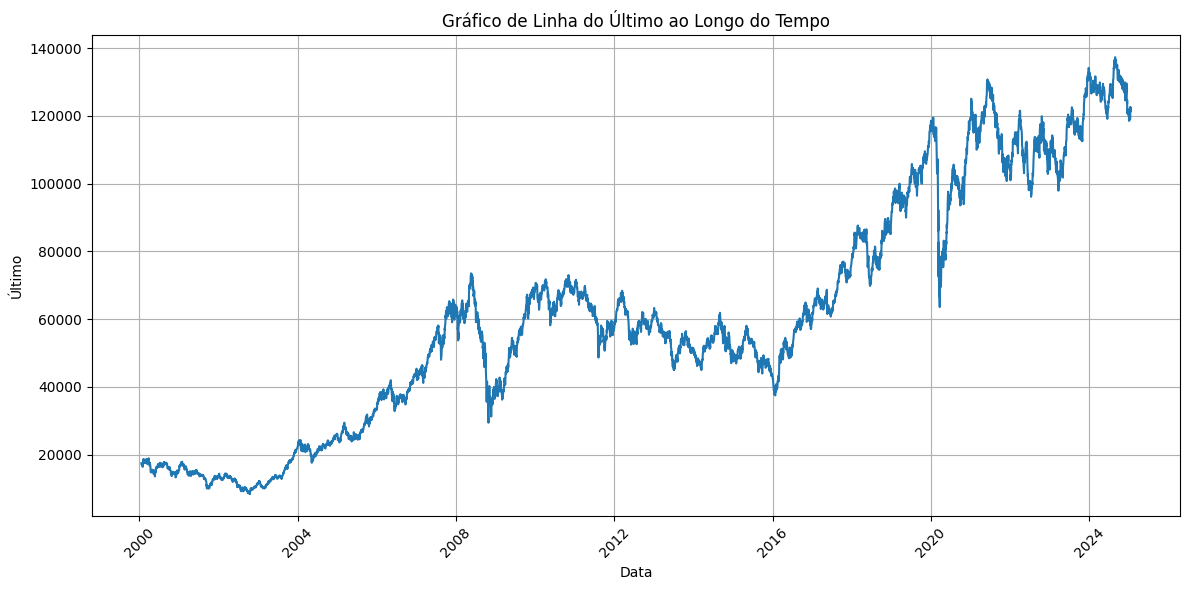

In [151]:
import matplotlib.pyplot as plt

df['Data'] = pd.to_datetime(df['Data'])

df = df.set_index('Data')
df = df.sort_index()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Último'])
plt.xlabel("Data")
plt.ylabel("Último")
plt.title("Gráfico de Linha do Último ao Longo do Tempo")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Regressão Linear

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
import numpy as np

df_regression = df[['Último']].copy()
df_regression = df_regression.sort_index(ascending=True)

df_regression['Lag1'] = df_regression['Último'].shift(1)
df_regression.dropna(inplace=True)

X = df_regression[['Lag1']]
y = df_regression['Último']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train) # Treinando o Modelo

y_pred = model.predict(X_test) # Realizando a Predição

# Calcular métricas de avaliação
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
mae = mean_absolute_error(y_test, y_pred)  # MAE

# Exibir as métricas no console
print(f'Erro Médio Absoluto Percentual (MAPE): {mape:.2f}%')
print(f'Erro Médio Absoluto (MAE): {mae:.2f}')

# Fazer a previsão do próximo valor com base no último valor conhecido
last_value = df_regression['Último'].iloc[-1]  # Último valor conhecido
predicted_value = model.predict(np.array([[last_value]]))  # Previsão para o próximo dia

# Exibir o próximo valor previsto
print(f'Próximo valor previsto do Ibovespa: {predicted_value[-1]:.2f}, com base no último valor conhecido: {last_value:.2f}')


Erro Médio Absoluto Percentual (MAPE): 1.23%
Erro Médio Absoluto (MAE): 667.37
Próximo valor previsto do Ibovespa: 122335.50, com base no último valor conhecido: 122350.00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [153]:
print(y_pred)

[ 73091.73534115  49325.87839798 119515.0621906  ... 128080.32540617
  89996.38668632  15014.85317157]


In [154]:
df_regression.head()

,Último,Lag1
Data,,
2000-01-20,17177,17470.0
2000-01-21,17034,17177.0
2000-01-24,16972,17034.0
2000-01-26,17105,16972.0
2000-01-27,17081,17105.0


In [155]:
print(df_regression.iloc[0])

Último    17177.0
Lag1      17470.0
Name: 2000-01-20 00:00:00, dtype: float64


In [156]:
df_regression.tail(10)

,Último,Lag1
Data,,
2025-01-06,120022,118533.0
2025-01-07,121163,120022.0
2025-01-08,119625,121163.0
2025-01-09,119781,119625.0
2025-01-10,118856,119781.0
2025-01-13,119007,118856.0
2025-01-14,119299,119007.0
2025-01-15,122650,119299.0
2025-01-16,121234,122650.0


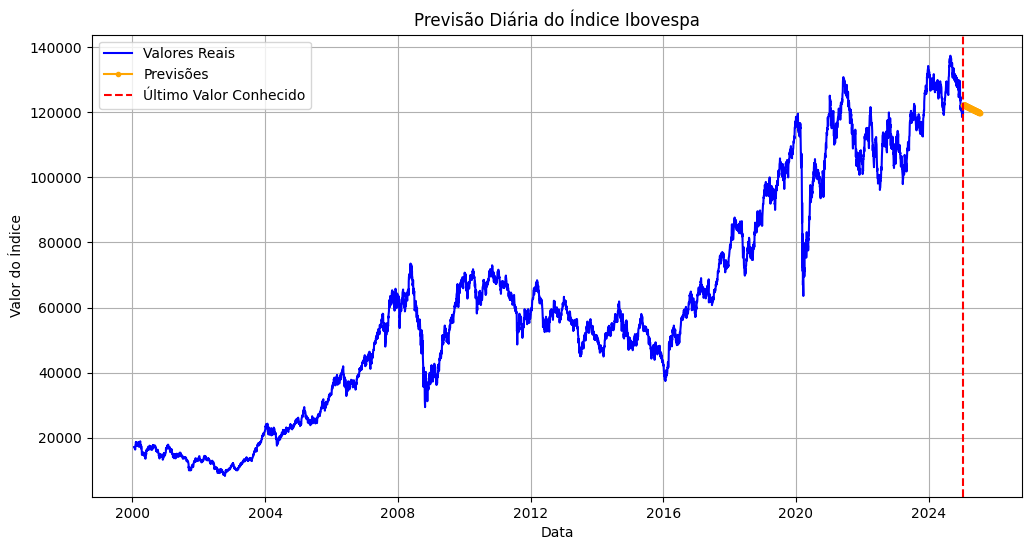

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Pegando a predição para os proximos 180 dias
num_days = 180
predictions = []
dates = []

last_value = df_regression['Último'].iloc[-1]
last_date = df_regression.index[-1]

# Fazer previsões para os próximos dias
for i in range(num_days):
    # Prever o próximo valor com base no último valor conhecido
    predicted_value = model.predict(pd.DataFrame({'Lag1': [last_value]}))[-1]

    # Adicionar a previsão à lista
    predictions.append(predicted_value)

    # Adicionar a data correspondente (próximo dia)
    next_date = last_date + pd.DateOffset(days=i + 1)
    dates.append(next_date)

    # Atualizar last_value para a próxima previsão
    last_value = predicted_value

# Criar um DataFrame com as previsões
df_predictions = pd.DataFrame({
    'Data': dates,
    'Previsão': predictions
})

# Definir a coluna 'Data' como índice
df_predictions.set_index('Data', inplace=True)

# Plotar os resultados
plt.figure(figsize=(12, 6))
plt.plot(df_regression.index, df_regression['Último'], label='Valores Reais', color='blue')
plt.plot(df_predictions.index, df_predictions['Previsão'], label='Previsões', color='orange', marker='.')
plt.title('Previsão Diária do Índice Ibovespa')
plt.xlabel('Data')
plt.ylabel('Valor do Índice')
plt.axvline(x=pd.to_datetime(df_regression.index[-1]), color='red', linestyle='--', label='Último Valor Conhecido')
plt.legend()
plt.grid()
plt.show()


In [158]:
df_predictions = df_predictions.sort_index()
df_predictions.tail(10)

,Previsão
Data,
2025-07-07,119983.840371
2025-07-08,119970.650611
2025-07-09,119957.468141
2025-07-10,119944.292957
2025-07-11,119931.125056
2025-07-12,119917.964432
2025-07-13,119904.811083
2025-07-14,119891.665004
2025-07-15,119878.526191


# Prophet

In [159]:
!pip install prophet


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxtt534wn/9oj78pgs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxtt534wn/tbf6xfyk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34410', 'data', 'file=/tmp/tmpxtt534wn/9oj78pgs.json', 'init=/tmp/tmpxtt534wn/tbf6xfyk.json', 'output', 'file=/tmp/tmpxtt534wn/prophet_modelznramken/prophet_model-20250122015018.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:50:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:50:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Erro Médio Absoluto Percentual (MAPE): 8.07%
Erro Médio Absoluto (MAE): 8346.46


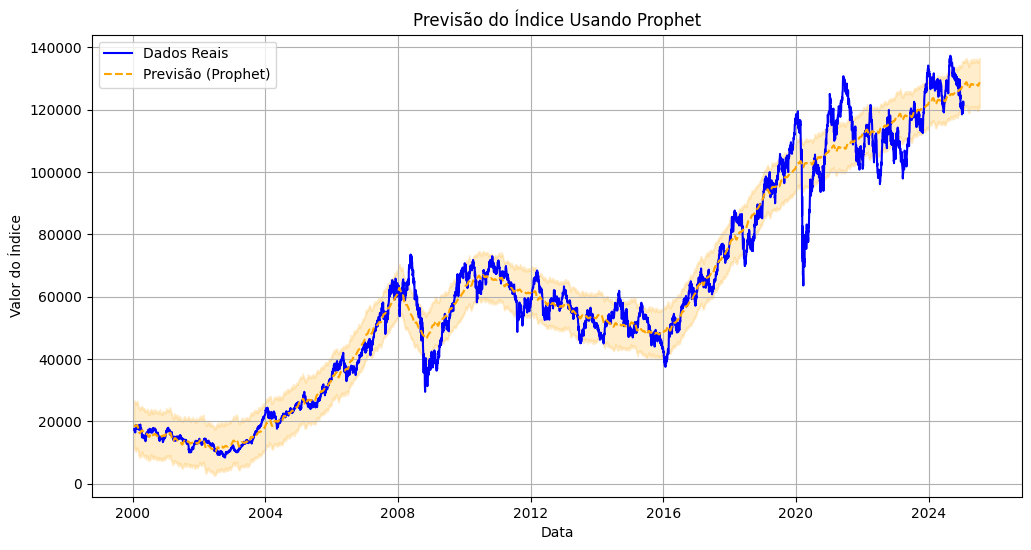

In [160]:
import pandas as pd
import prophet
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
import matplotlib.pyplot as plt


df_prophet = df['Último'].reset_index()
df_prophet = df_prophet.reset_index().rename(columns={'Data': 'ds', 'Último': 'y'})


# Ajustar o modelo Prophet
model = prophet.Prophet()
model.fit(df_prophet)

# Fazer previsões para os próximos 180 dias
future = model.make_future_dataframe(periods=180)
forecast = model.predict(future)

# Calcular erro se houver dados de teste disponíveis
if 'y' in df_prophet.columns:
    test_size = int(len(df_prophet) * 0.2)   # Tamanho do conjunto de teste
    test = df_prophet[-test_size:]  # Últimos 180 dias como teste
    mape = mean_absolute_percentage_error(test['y'], forecast['yhat'][-test_size:]) * 100
    mae = mean_absolute_error(test['y'], forecast['yhat'][-test_size:])
    print(f"Erro Médio Absoluto Percentual (MAPE): {mape:.2f}%")
    print(f'Erro Médio Absoluto (MAE): {mae:.2f}')

# Exibir previsões para os próximos 180 dias
predictions = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(180)

# Plotar os resultados
plt.figure(figsize=(12, 6))
plt.plot(df_prophet['ds'], df_prophet['y'], label='Dados Reais', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Previsão (Prophet)', linestyle='--', color='orange')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2)
plt.xlabel("Data")
plt.ylabel("Valor do Índice")
plt.title("Previsão do Índice Usando Prophet")
plt.legend()
plt.grid(True)
plt.show()


In [161]:
predictions.tail(180)

,ds,yhat,yhat_lower,yhat_upper
6195,2025-01-18,128132.847515,120628.608331,135462.913323
6196,2025-01-19,128137.173133,120748.365921,135617.790903
6197,2025-01-20,128145.773737,120388.653956,135349.940467
6198,2025-01-21,128183.837344,120243.480071,135362.771590
6199,2025-01-22,128186.654939,120561.855297,135586.966733
...,...,...,...,...
6370,2025-07-12,128418.098351,120467.484444,136292.843186
6371,2025-07-13,128512.925465,120767.988290,136669.297265
6372,2025-07-14,128617.776201,120970.327194,136335.934137
6373,2025-07-15,128755.734042,121600.080672,136187.165378


# ARIMA

In [162]:
df['Diferenca_Primeiro_Ultimo'] = df['Último'].diff()
df_tratado = df.dropna()
df_tratado.info()
# retirado duas linhas do dataframe cujo tinham valores NaN

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6193 entries, 2000-01-20 to 2025-01-17
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Último                     6193 non-null   int64  
 1   Abertura                   6193 non-null   int64  
 2   Máxima                     6193 non-null   int64  
 3   Mínima                     6193 non-null   int64  
 4   Vol.                       6193 non-null   object 
 5   Var%                       6193 non-null   object 
 6   Diferenca_Primeiro_Ultimo  6193 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 387.1+ KB


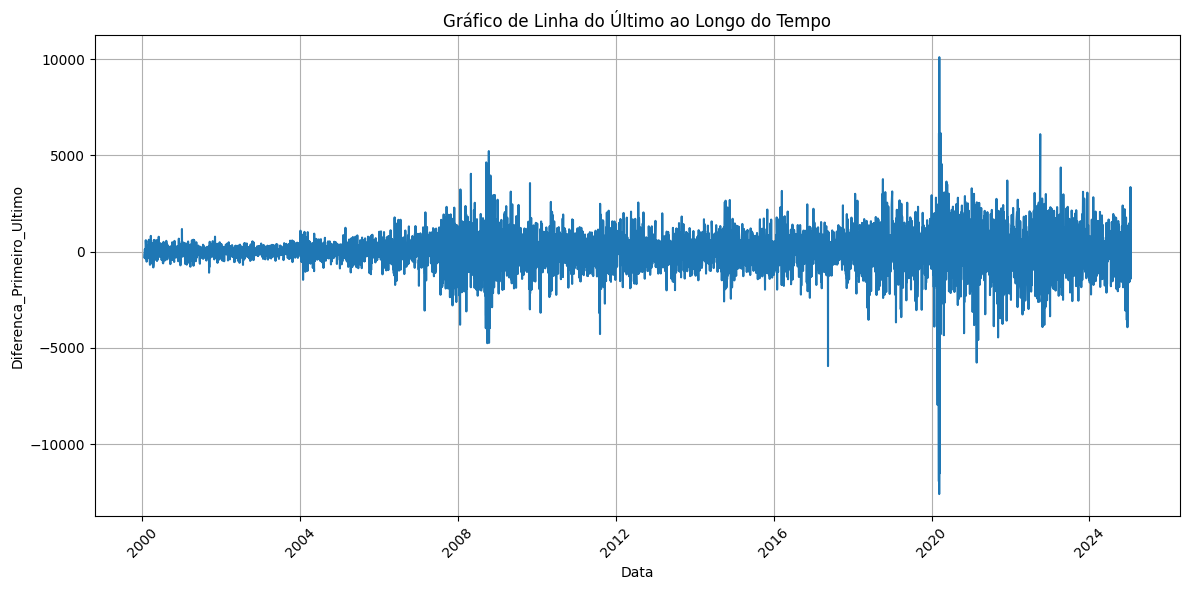

In [163]:
plt.figure(figsize=(12, 6))
plt.plot(df_tratado.index, df_tratado['Diferenca_Primeiro_Ultimo'])
plt.xlabel("Data")
plt.ylabel("Diferenca_Primeiro_Ultimo")
plt.title("Gráfico de Linha do Último ao Longo do Tempo")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [164]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_tratado['Diferenca_Primeiro_Ultimo'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] <= result[4]['1%'] :
    print("A série temporal é estacionária.")
else:
    print("A série temporal não é estacionária.")

ADF Statistic: -21.721815
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
A série temporal é estacionária.


In [165]:
!pip install pmdarima

Os parâmetros
𝑝
p,
𝑑
d e
𝑞
q no modelo ARIMA representam, respectivamente:


𝑝
p: Ordem do componente autorregressivo (AR) - número de defasagens (lags) da série.

𝑑
d: Grau de diferenciação - número de vezes que a série é diferenciada para torná-la estacionária. (Ou seja se a serie e estacionaria não vou utilizar esse parametro)

𝑞
q: Ordem do componente de média móvel (MA) - número de defasagens dos erros passados.

In [166]:
df_tratado.index = pd.to_datetime(df_tratado.index)
df_tratado = df_tratado.sort_index()

# Divide os dados em treinamento e teste (80% treinamento, 20% teste)
train_size = int(len(df_tratado) * 0.8)
train, test = df_tratado.iloc[:train_size], df_tratado.iloc[train_size:]

In [167]:
from pmdarima import auto_arima

model = auto_arima(train['Diferenca_Primeiro_Ultimo'], seasonal=False, trace=True)
print(model.summary())


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=80369.534, Time=9.37 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=80382.187, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0]             : AIC=80382.599, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=80382.487, Time=0.49 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=80375.348, Time=2.62 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=80375.287, Time=5.55 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0]             : AIC=80379.043, Time=6.56 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,0,0)[0]             : AIC=80378.935, Time=8.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=80375.557, Time=4.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(0,0,0)[0]             : AIC=80377.023, Time=4.75 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=80377.057, Time=2.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,3)(0,0,0)[0]             : AIC=80374.057, Time=7.48 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=80378.830, Time=9.75 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 61.328 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4954
Model:               SARIMAX(2, 0, 2)   Log Likelihood              -40179.767
Date:                Wed, 22 Jan 2025   AIC                          80369.534
Time:                        01:51:38   BIC                          80402.074
Sample:                             0   HQIC                         80380.944
                               - 4954                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8200      0.027     68.014      0.000       1.76

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Erro Médio Absoluto Percentual (MAPE): 104.36%
Erro Médio Absoluto (MAE): 1148.86


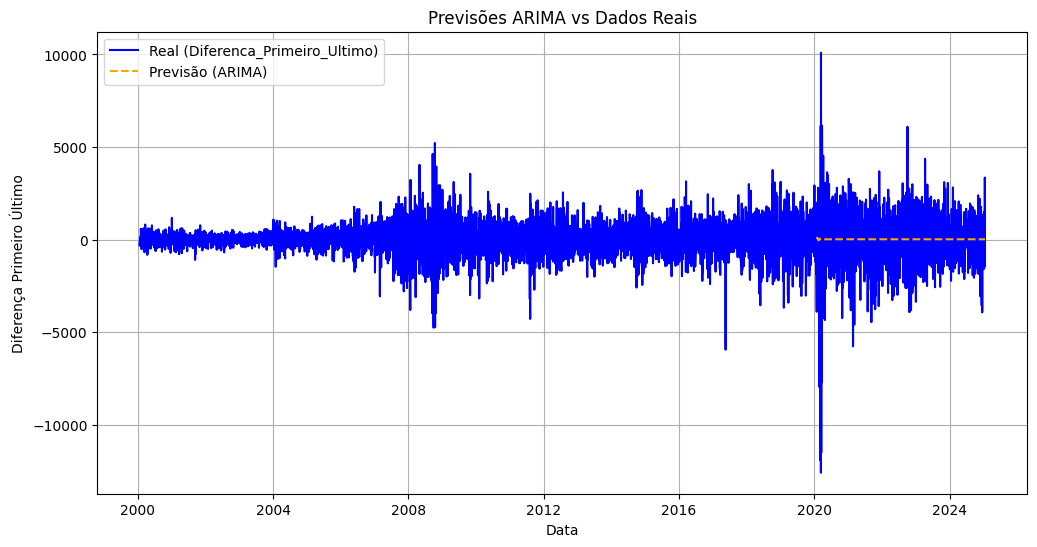

In [168]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np


train_size = int(len(df_tratado) * 0.8)  # 80% para treinamento
train, test = df_tratado.iloc[:train_size], df_tratado.iloc[train_size:]

p = 2
d = 0  # Como e estacionaria não vou utilizar esse parametro
q = 2

# Ajustar o modelo ARIMA
model = ARIMA(train['Diferenca_Primeiro_Ultimo'], order=(p, d, q))
model_fit = model.fit()

# Realizar previsões para o conjunto de teste
forecast = model_fit.forecast(steps=len(test))

# Criar a coluna de previsão no DataFrame tratado
df_tratado['Previsao_ARIMA'] = np.nan

# Garantir o alinhamento correto entre índices do conjunto de teste e as previsões
df_tratado.loc[test.index, 'Previsao_ARIMA'] = forecast.values

# Calcular o erro médio absoluto percentual (MAPE) usando sklearn
mape = mean_absolute_percentage_error(test['Diferenca_Primeiro_Ultimo'], forecast) * 100
mae = mean_absolute_error(test['Diferenca_Primeiro_Ultimo'],forecast)

print(f"Erro Médio Absoluto Percentual (MAPE): {mape:.2f}%")
print(f'Erro Médio Absoluto (MAE): {mae:.2f}')

# Plotar os resultados
plt.figure(figsize=(12, 6))
plt.plot(df_tratado.index, df_tratado['Diferenca_Primeiro_Ultimo'], label='Real (Diferenca_Primeiro_Ultimo)', color='blue')
plt.plot(df_tratado.index, df_tratado['Previsao_ARIMA'], label='Previsão (ARIMA)', linestyle='--', color='orange')
plt.xlabel("Data")
plt.ylabel("Diferença Primeiro Último")
plt.title("Previsões ARIMA vs Dados Reais")
plt.legend()
plt.grid(True)
plt.show()


In [169]:
df_tratado.tail()

,Último,Abertura,Máxima,Mínima,Vol.,Var%,Diferenca_Primeiro_Ultimo,Previsao_ARIMA
Data,,,,,,,,
2025-01-13,119007,118856,119729,118743,"8,16B","0,13%",151.0,19.634006
2025-01-14,119299,119007,119451,118223,"9,35B","0,25%",292.0,19.634006
2025-01-15,122650,119309,122988,119303,"11,93B","2,81%",3351.0,19.634006
2025-01-16,121234,122649,122660,120796,"11,31B","-1,15%",-1416.0,19.634006
2025-01-17,122350,121258,122674,121074,"10,24B","0,92%",1116.0,19.634006
